step1. 데이터 수집/전처리

step2. 데이터 모델링(학습방법적용)

step3. 평가/하이퍼파라미터 조정

step4. 배포

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Step1. Data Load, Preprocessing

In [3]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.info() # 768 rows, 9 colums

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


 -> NULL이 없음, 다 숫자네?, 

In [4]:
diabetes_data.head(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [9]:
# diabetes_data['Pregnancies'].max()
def check_value_range(colnames):
    for colname in colnames:
        print(colname,'의 최소값: ', diabetes_data[colname].min())
        print(colname,'의 최소값: ', diabetes_data[colname].max())
        print()

In [13]:
check_value_range(diabetes_data.columns)

Pregnancies 의 최소값:  0
Pregnancies 의 최소값:  17

Glucose 의 최소값:  0
Glucose 의 최소값:  199

BloodPressure 의 최소값:  0
BloodPressure 의 최소값:  122

SkinThickness 의 최소값:  0
SkinThickness 의 최소값:  99

Insulin 의 최소값:  0
Insulin 의 최소값:  846

BMI 의 최소값:  0.0
BMI 의 최소값:  67.1

DiabetesPedigreeFunction 의 최소값:  0.078
DiabetesPedigreeFunction 의 최소값:  2.42

Age 의 최소값:  21
Age 의 최소값:  81

Outcome 의 최소값:  0
Outcome 의 최소값:  1



 -> 최소값이 0 인것은 뭐지? 데이터 봐야할듯?
 

In [23]:
print(diabetes_data['Outcome'].unique()) # 종류는 1 or 0
print('\n',diabetes_data['Outcome'].value_counts()) # 0: 500개 1:268개


[1 0]

 0    500
1    268
Name: Outcome, dtype: int64


In [14]:
import numpy as np

from sklearn.preprocessing import StandardScaler # 표준화
from sklearn.model_selection import train_test_split # 데이터 분할
from sklearn.linear_model import LogisticRegression # 모델링 알고리즘(분류)
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
# f1_score는 precision_score와 reacll_score의 조화평균이다. 둘이 비슷해야 높게나오고 아니면 낮겠지.


In [15]:
# iloc[a,b]  ->  position. 
X = diabetes_data.iloc[:,:-1] # 행, 마지역열 제외
y = diabetes_data.iloc[:,-1] # 행, 맨마지막 열만 추출 -> 지도학습 적용하려고 label추출

# classificaion문제라서 stratify=y 를 사용한다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)


In [20]:
y_train.value_counts() # 0:400 65% , 1:214 35%

0    400
1    214
Name: Outcome, dtype: int64

In [21]:
y_test.value_counts()

0    100
1     54
Name: Outcome, dtype: int64

In [28]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

## step2. Data modeling

In [29]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test) # 기본cutoff인 0.5기준으로 0 or 1로 예측
pred_proba = lr_clf.predict_proba(X_test)[:,1] # 0,1 이 될 확률값

get_clf_eval(y_test , pred, pred_proba)

오차 행렬
[[88 12]
 [23 31]]
정확도: 0.7727, 정밀도: 0.7209, 재현율: 0.5741,    F1: 0.6392, AUC:0.7919


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


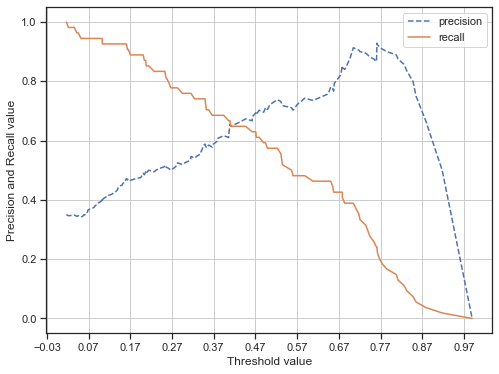

In [42]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [ ]:
precisions, recalls, threshold = precision_recall_curve_plot(y_test, pred_proba_c1)

> cutoff찾기전에 데이터 재확인

In [32]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

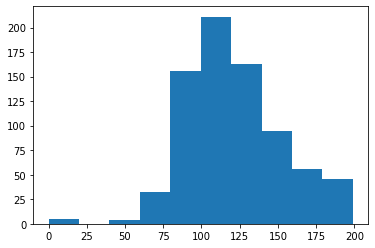

In [33]:
plt.hist(diabetes_data['Glucose'], bins=10)

> 시각화 패키지 한번보자

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Dist')

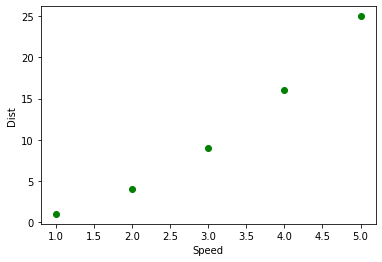

In [40]:
# x=[1,2,3,4,5]
# plt.plot(x)
x = np.array([1,2,3,4,5])
y=x**2
plt.plot(x,y,'go')
plt.xlabel('Speed')
plt.ylabel('Dist')

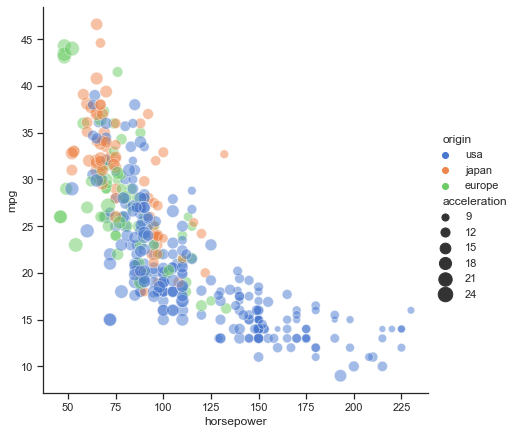

In [41]:
import seaborn as sns
sns.set(style='ticks')

mpg = sns.load_dataset('mpg')
sns.relplot(x='horsepower', y='mpg', hue='origin', size='acceleration',
           sizes=(40, 220), alpha=.5, palette='muted',
           height=6, data=mpg)

plt.show()